Dany jest sygnał rzeczywisty 𝑠(𝑡) = 𝐴1 𝑠𝑖𝑛(2𝜋𝑓1𝑡) + 𝐴2 𝑠𝑖𝑛(2𝜋𝑓2𝑡) + 𝐴3 𝑠𝑖𝑛(2𝜋𝑓3𝑡) , gdzie 𝐴1 =
0.3 , 𝑓1 = 5000 Hz, 𝐴2 = 0.4 , 𝑓2 = 6000 Hz, 𝐴3 = 0.5 , 𝑓3 = 11000 Hz. Przy założeniu, że
częstotliwość próbkowania wynosi 𝑓𝑠 = 48000 Hz, a liczba próbek sygnału wynosi 𝑁1 = 2048 ,
przedstawić wykres widmowej gęstości mocy sygnału spróbkowanego. Czy dla podanej liczby próbek
mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek
𝑁2 = (3/2) * 𝑁1? Odpowiedź uzasadnić.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

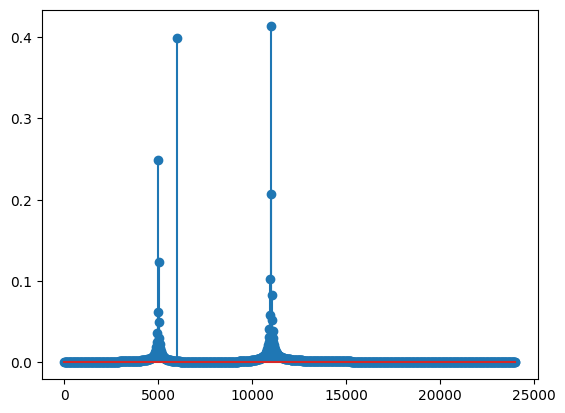

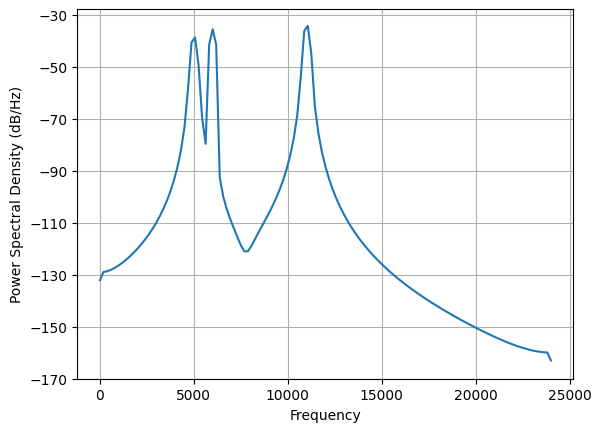

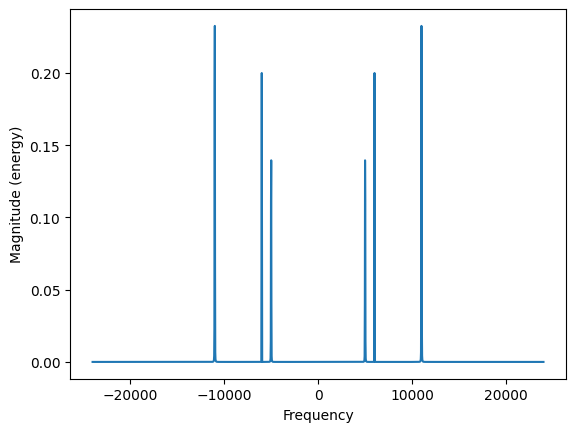

In [ ]:
A = np.arange(0.3, 0.6, 0.1)
f = np.array([5000, 6000, 11000])

fs = 48000

N1 = 2048
N2 = int((1.5)*N1)

s_part = lambda ampl, freq, t: ampl* np.sin(2*np.pi * t * freq)
signal = lambda t: np.sum([s_part(A[i], f[i], t) for i in range(3)])
# signal = lambda t: s_part[A[0], f[0], t)

# def power_density(signal, N):
#     return np.abs(np.fft.fft(signal)) ** 2 / N

# t1 = np.arange(N1) / fs
# t2 = np.arange(N2) / fs

# sig1 = signal(t1)
# sig2 = signal(t2)

# # Obliczenie FFT i gęstości mocy
# pden1 = power_density(sig1, N1)
# pden2 = power_density(sig2, N2)

# # Obliczenie częstotliwości odpowiadających próbek
# freq1 = np.fft.fftfreq(N1, 1/fs)
# freq2 = np.fft.fftfreq(N2, 1/fs)

# # Wybór tylko dodatnich częstotliwości
# pden1 = pden1[:N1//2]
# pden2 = pden2[:N2//2]
# freq1 = freq1[:N1//2]
# freq2 = freq2[:N2//2]


# plt.figure(figsize=(10,6))
# plt.plot(freq1, pden1, label=f'N = {N1} próbek', color='blue')
# plt.plot(freq2, pden1, label=f'N = {N2} próbek', color='red', linestyle='dashed')
# plt.title('Widmo gęstości mocy sygnału')
# plt.xlabel('Częstotliwość (Hz)')
# plt.ylabel('Gęstość mocy')
# plt.legend()
# plt.grid(True)
# plt.show()


def calculate_magnitude(sig):
    value = [2*np.abs(val)/len(sig) for val in np.fft.rfft(sig)]
    value[0] /= 2
    return value

def signal_desc(sig):
    values = calculate_magnitude(sig)
    delta_f = fs / len(sig)
    plt.stem([i*delta_f for i in range(len(values))], values)
    plt.show()
    plt.psd(sig, Fs=fs)
    plt.show()
    plt.magnitude_spectrum(sig, Fs=fs, sides='twosided')
    plt.show()

signal_desc([signal(n/fs) for n in range(N1)])

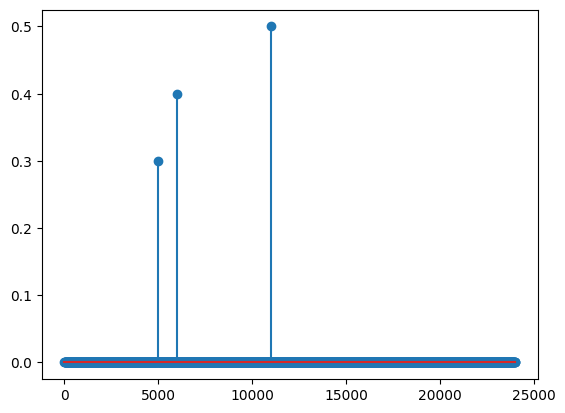

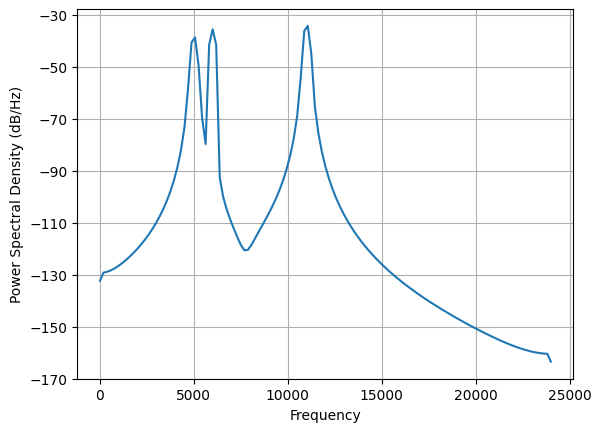

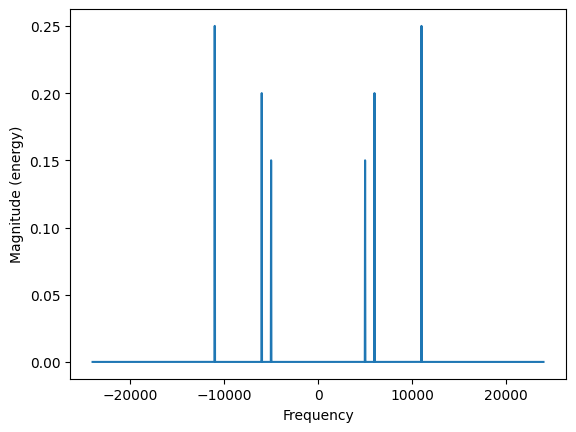

In [26]:
signal_desc([signal(n/fs) for n in range(N2)])

**Dodatkowe obliczenia**

window = 48.0


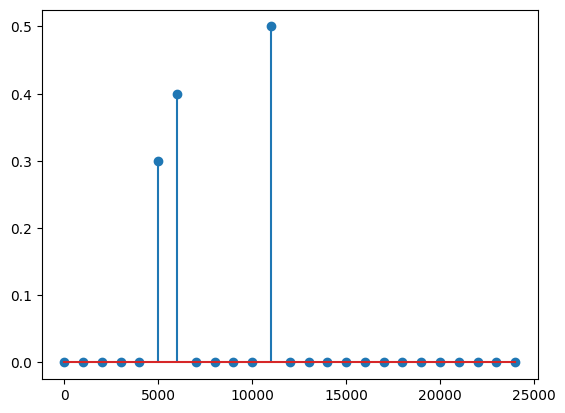

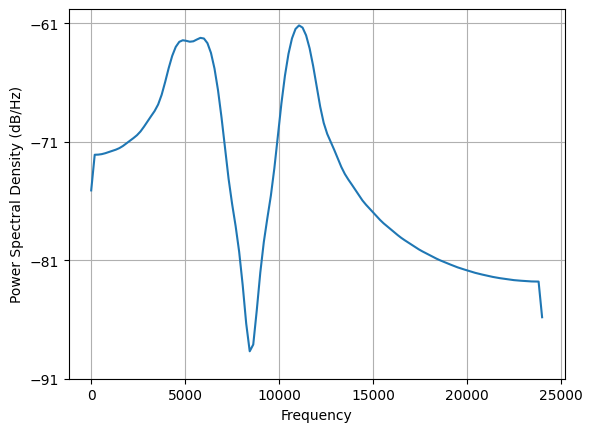

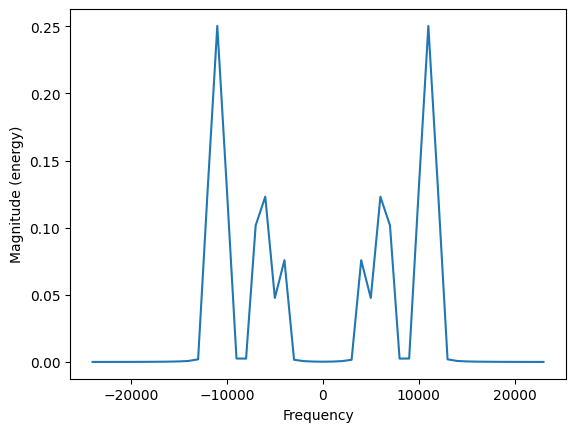

In [27]:
frequency = np.gcd.reduce([f[0], f[1], f[2]])
window = fs / frequency
print('window =', window)
signal_desc([signal(n/fs) for n in range(int(window))])

**Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma?**  
Tak, moc z 3 prążków "rozlewa" się na inne częstotliwości.

**Czy sytuacja uległaby zmianie dla liczby próbek N2 = 3 * N1 / 2?**  
Tak, sytuacja ulega zmianie. Liczba N2 = 3072 jest podzielna przez zmienną window (48) dla danej częstotliwości fs.

**Wnioski**  
Przecieki widma są spowodowane nieciągłością przy zapętleniu okna analizy.
Aby zapobiec przeciekowi widma, należy skończyć próbkowanie w tym samym miejscu okresu sygnału co zaczeliśmy próbkowanie.